In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [64]:
df.shape

(183, 12)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

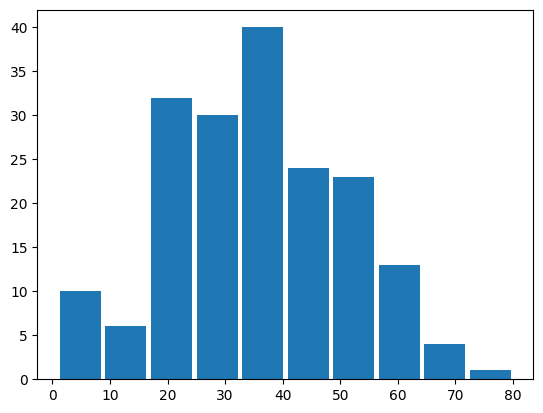

In [21]:
age = df['Age']
plt.hist(age, rwidth=0.9)

plt.show()

In [ ]:
deaths = []
survivors = []

unique_classes = df['Pclass'].unique()
unique_classes.sort()

for c in unique_classes:
    deaths.append(df[(df['Pclass'] == c) & (df['Survived'] == 0)]['Survived'].count())
    survivors.append(df[(df['Pclass'] == c) & (df['Survived'] == 1)]['Survived'].count())

[106, 12, 5]


In [69]:
counted_values = df.groupby('Pclass')['Survived'].value_counts()
counted_values.keys().tolist()
counted_values.tolist()



[106, 52, 12, 3, 5, 5]

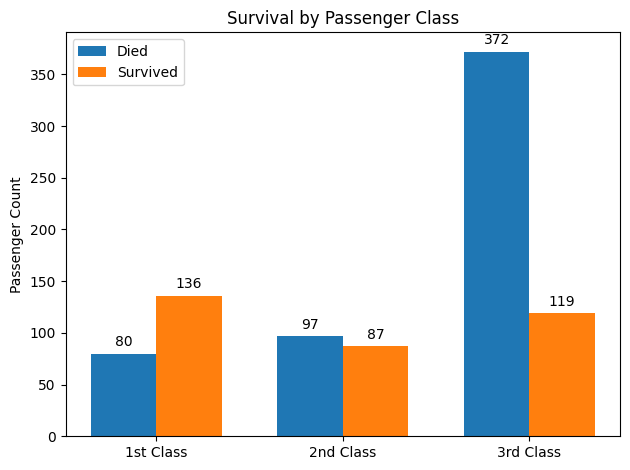

In [ ]:
# --- 1. Define the data (you'd get this from pandas) ---
labels = ['1st Class', '2nd Class', '3rd Class']
died_counts = [80, 97, 372]      # Counts for Survived=0
survived_counts = [136, 87, 119]  # Counts for Survived=1

# --- 2. Set up the X-axis positions and bar width ---
x = np.arange(len(labels))  # The label locations: [0, 1, 2]
width = 0.35  # The width of *one* bar

# --- 3. Create the plot and axes ---
fig, ax = plt.subplots()

# --- 4. Plot the two sets of bars ---
# We plot 'Died' bars at x - width/2
rects1 = ax.bar(x - width/2, died_counts, width, label='Died')

# We plot 'Survived' bars at x + width/2
rects2 = ax.bar(x + width/2, survived_counts, width, label='Survived')

# --- 5. Add labels, title, and the legend ---
ax.set_ylabel('Passenger Count')
ax.set_title('Survival by Passenger Class')

# This is the key: set the x-ticks to be in the *middle* of the two bars
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.legend()

# Optional: Add labels on top of the bars to show the count
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout() # Cleans up the plot
plt.show()